# Preparation & Data exploration

In [69]:
! pip install category_encoders --quiet

In [118]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import category_encoders as ce

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PowerTransformer

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import KMeansSMOTE

In [71]:
DIR_PATH = "/content/drive/MyDrive/Colab Notebooks/ML CCC"

RANDOM_STATE = 42

In [72]:
X_train = pd.read_csv(os.path.join(DIR_PATH, 'X_train.csv'))
X_test = pd.read_csv(os.path.join(DIR_PATH, 'X_test.csv'))
y_train = pd.read_csv(os.path.join(DIR_PATH, 'y_train.csv'))
y_test = pd.read_csv(os.path.join(DIR_PATH, 'y_test.csv'))

In [73]:
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

In [74]:
X_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8252 entries, 0 to 8251
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8252 non-null   int64  
 1   Own_car          8252 non-null   int64  
 2   Own_property     8252 non-null   int64  
 3   Work_phone       8252 non-null   int64  
 4   Phone            8252 non-null   int64  
 5   Email            8252 non-null   int64  
 6   Unemployed       8252 non-null   int64  
 7   Num_children     8252 non-null   int64  
 8   Num_family       8252 non-null   int64  
 9   Account_length   8252 non-null   int64  
 10  Total_income     8252 non-null   float64
 11  Age              8252 non-null   float64
 12  Years_employed   8252 non-null   float64
 13  Income_type      8252 non-null   object 
 14  Education_type   8252 non-null   object 
 15  Family_status    8252 non-null   object 
 16  Housing_type     8252 non-null   object 
 17  Occupation_typ

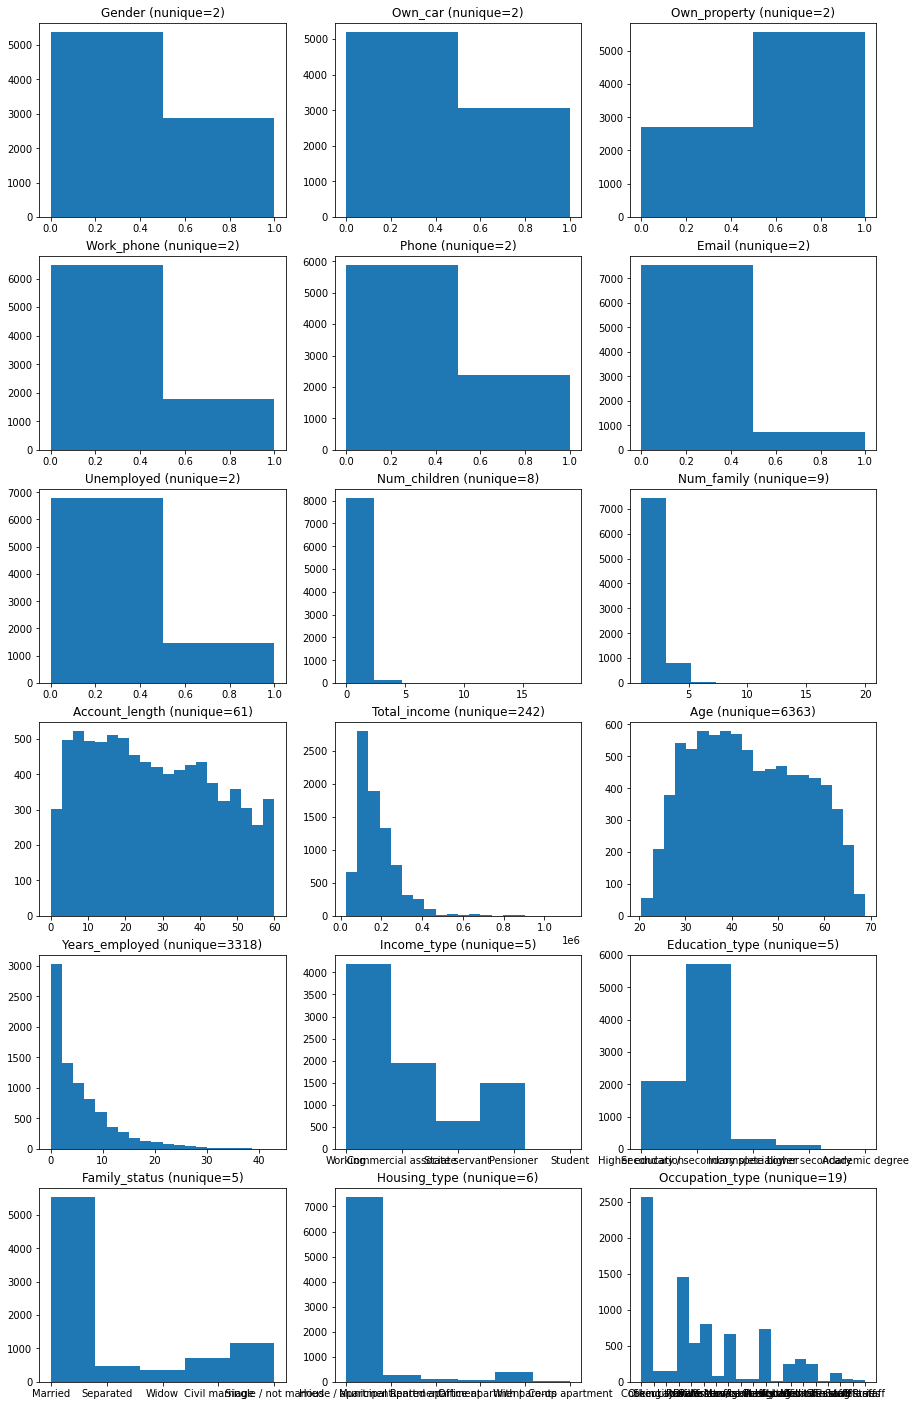

In [75]:
fig, axs = plt.subplots(6, 3, figsize=(15, 25))

for i, column_name in enumerate(X_train):
    column = X_train[column_name]
    nunique = column.nunique()

    axs[i//3, i%3].hist(column, bins=min(nunique, 20))
    axs[i//3, i%3].set_title(f'{column_name} (nunique={nunique})')

In [76]:
CATEGORICAL_COL_NAMES = ['Income_type', 'Education_type', 'Family_status',
                         'Housing_type', 'Occupation_type']
for col_name in CATEGORICAL_COL_NAMES:
    print(X_train[col_name].value_counts())
    print()

Working                 4193
Commercial associate    1951
Pensioner               1482
State servant            624
Student                    2
Name: Income_type, dtype: int64

Secondary / secondary special    5720
Higher education                 2113
Incomplete higher                 312
Lower secondary                   104
Academic degree                     3
Name: Education_type, dtype: int64

Married                 5544
Single / not married    1162
Civil marriage           709
Separated                487
Widow                    350
Name: Family_status, dtype: int64

House / apartment      7383
With parents            375
Municipal apartment     271
Rented apartment        125
Office apartment         67
Co-op apartment          31
Name: Housing_type, dtype: int64

Other                    2565
Laborers                 1452
Sales staff               804
Core staff                738
Managers                  666
Drivers                   532
High skill tech staff     319
Acco

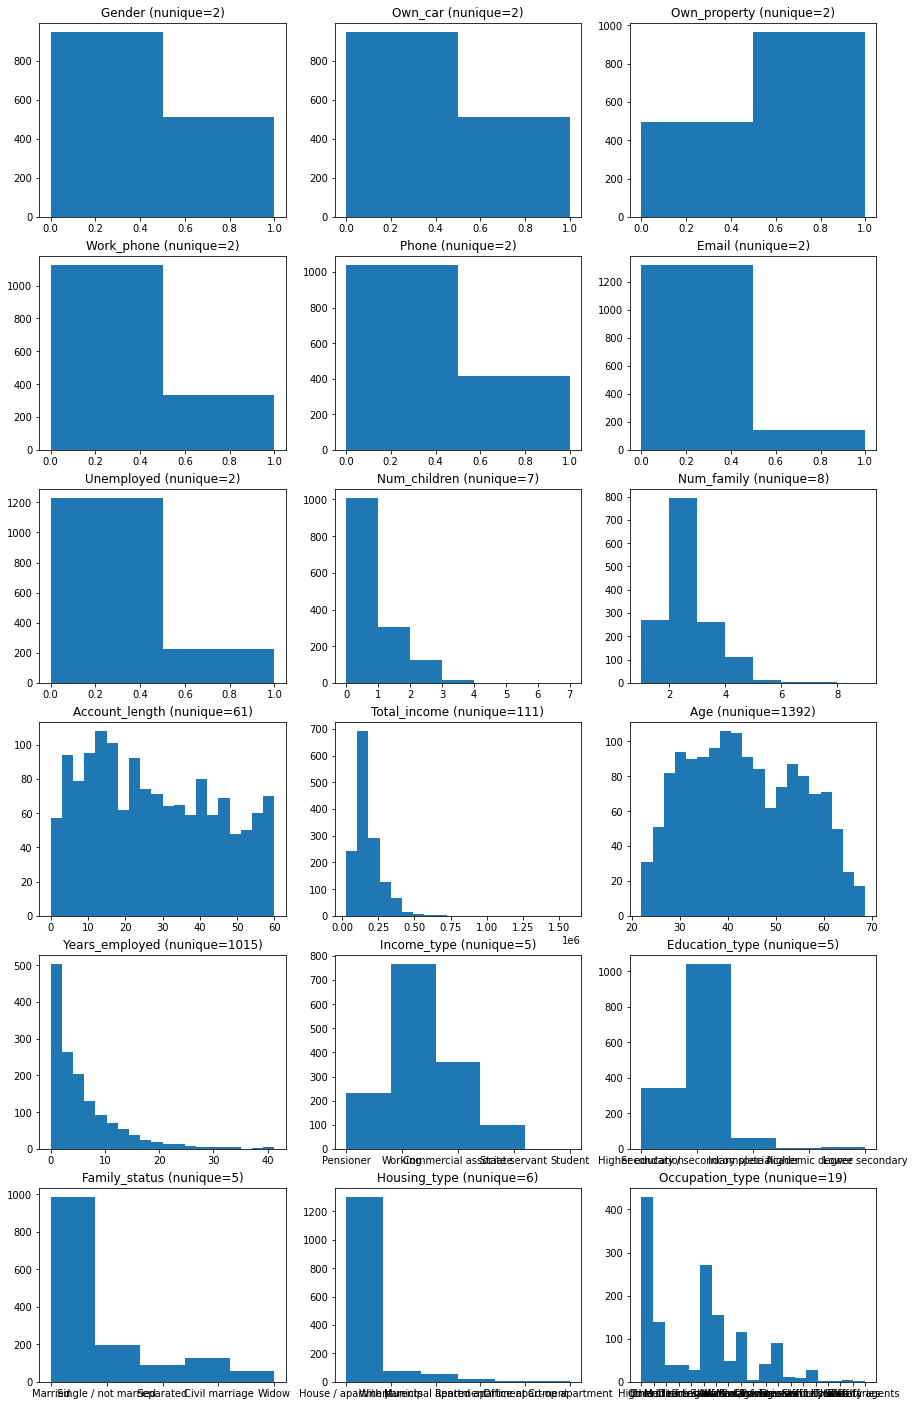

In [77]:
fig, axs = plt.subplots(6, 3, figsize=(15, 25))

for i, column_name in enumerate(X_test):
    column = X_test[column_name]
    nunique = column.nunique()

    axs[i//3, i%3].hist(column, bins=min(nunique, 20))
    axs[i//3, i%3].set_title(f'{column_name} (nunique={nunique})')

In [78]:
X_train.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type
0,0,0,1,0,0,0,0,0,2,59,202500.0,31.409269,1.631793,Working,Higher education,Married,House / apartment,Other
1,0,1,1,0,0,0,0,1,3,59,130500.0,38.746860,15.222763,Working,Secondary / secondary special,Married,House / apartment,Cooking staff
2,1,0,0,1,1,0,0,1,3,6,180000.0,39.428599,2.680411,Commercial associate,Secondary / secondary special,Married,House / apartment,Security staff
3,1,0,1,0,0,0,0,1,2,1,99000.0,40.208902,0.793993,Working,Secondary / secondary special,Separated,House / apartment,Laborers
4,0,0,1,0,0,0,0,3,5,42,179100.0,36.255365,5.002156,State servant,Secondary / secondary special,Married,House / apartment,Cooking staff


In [79]:
X_train.shape

(8252, 18)

(array([7162.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1090.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

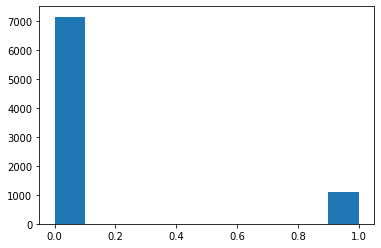

In [80]:
plt.hist(y_train)

#power transform
Num_children to Years_employed   

In [81]:
X_train_filtered = X_train.loc[:, 'Num_children':'Years_employed']
X_train_filtered

,Num_children,Num_family,Account_length,Total_income,Age,Years_employed
0,0,2,59,202500.0,31.409269,1.631793
1,1,3,59,130500.0,38.746860,15.222763
2,1,3,6,180000.0,39.428599,2.680411
3,1,2,1,99000.0,40.208902,0.793993
4,3,5,42,179100.0,36.255365,5.002156
...,...,...,...,...,...,...
8247,0,2,2,225000.0,31.803528,9.155561
8248,0,2,51,202500.0,40.277350,17.591053
8249,0,2,37,157500.0,64.789831,0.000000
8250,1,3,53,225000.0,41.769509,23.721226


In [82]:
transformer = PowerTransformer()
X_train_filtered_transformed = transformer.fit_transform(X_train_filtered)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [83]:
X_train.loc[:, 'Num_children':'Years_employed'] = X_train_filtered_transformed

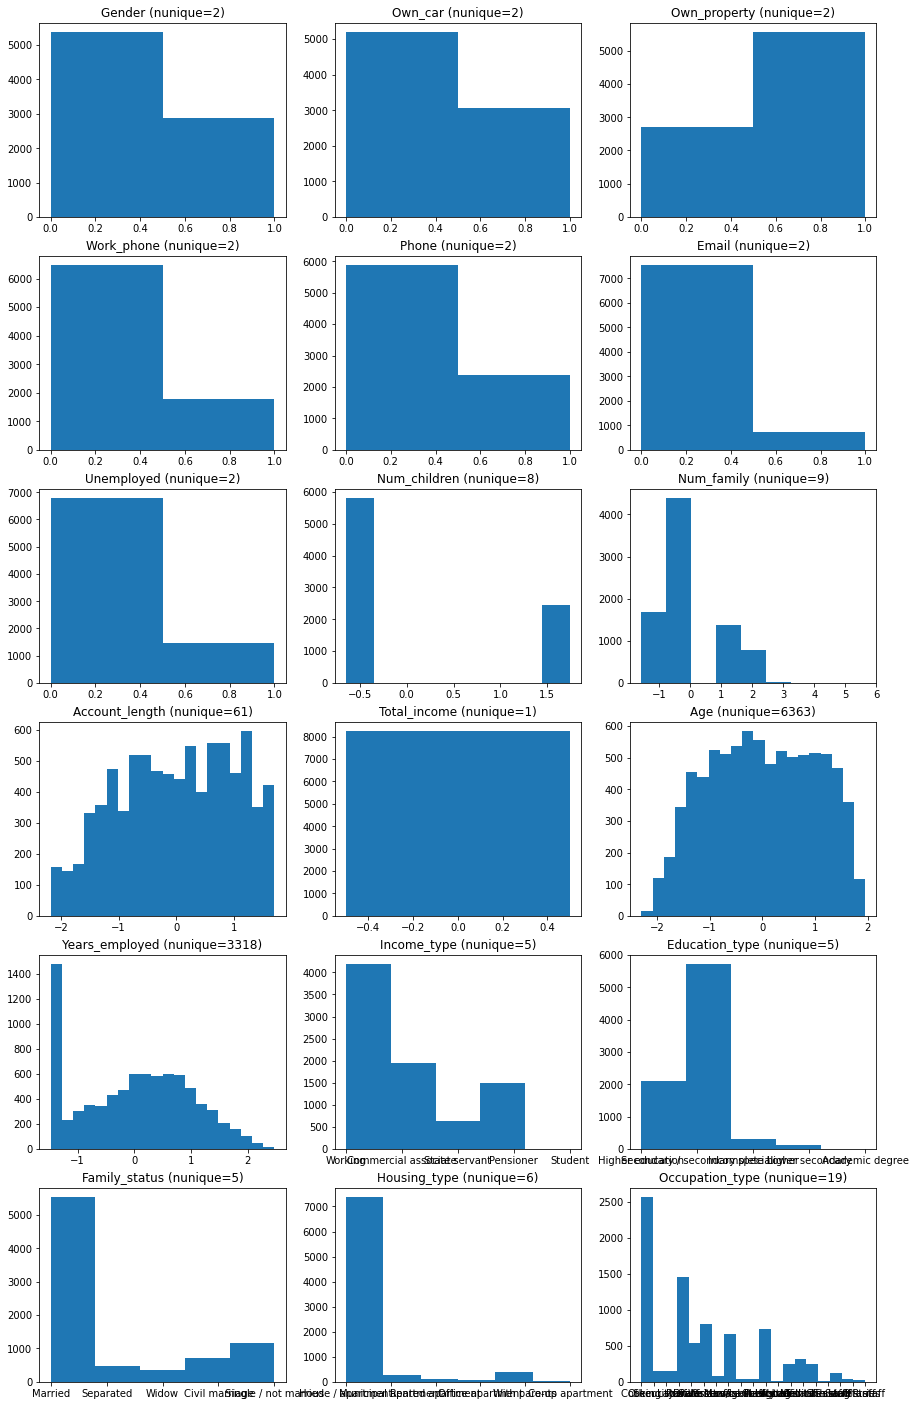

In [84]:
fig, axs = plt.subplots(6, 3, figsize=(15, 25))

for i, column_name in enumerate(X_train):
    column = X_train[column_name]
    nunique = column.nunique()

    axs[i//3, i%3].hist(column, bins=min(nunique, 20))
    axs[i//3, i%3].set_title(f'{column_name} (nunique={nunique})')

In [85]:
X_test_filtered_transformed = transformer.transform(
    X_test.loc[:, 'Num_children':'Years_employed'])

In [86]:
X_test.loc[:, 'Num_children':'Years_employed'] = X_test_filtered_transformed

# ONE HOT

In [87]:
enc = ce.one_hot.OneHotEncoder()

In [88]:
X_train = enc.fit_transform(X_train, y_train)

In [89]:
X_train

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,...,Occupation_type_10,Occupation_type_11,Occupation_type_12,Occupation_type_13,Occupation_type_14,Occupation_type_15,Occupation_type_16,Occupation_type_17,Occupation_type_18,Occupation_type_19
0,0,0,1,0,0,0,0,-0.647202,-0.037197,1.657132,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,1.468683,0.972997,1.657132,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,0,0,1.468683,0.972997,-1.383327,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,1.468683,-0.037197,-1.991669,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1.710836,2.286411,0.895521,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8247,1,0,1,1,1,0,0,-0.647202,-0.037197,-1.842313,...,0,0,0,0,0,0,0,0,0,0
8248,0,1,1,0,0,0,0,-0.647202,-0.037197,1.311186,...,0,0,0,0,0,0,0,0,0,0
8249,1,0,1,0,0,0,1,-0.647202,-0.037197,0.649601,...,0,0,0,0,0,0,0,0,0,0
8250,0,0,1,0,0,0,0,1.468683,0.972997,1.399548,...,0,0,0,0,0,0,0,0,0,0


In [90]:
X_test = enc.fit_transform(X_test, y_test)

# SMOTE

SMOTE wo/ sampling_strategy around 0.1

In [144]:
smote = SMOTE(#sampling_strategy={0: 10000, 1:10000},
                   #cluster_balance_threshold = 0.2, 
              random_state=RANDOM_STATE)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# RF

In [155]:
rf = RandomForestClassifier(n_estimators=100, 
                            max_depth=5,  # seriously overfitting without this param
                            random_state=RANDOM_STATE).fit(X_train_over, y_train_over)

In [156]:
fbeta_score(y_test, rf.predict(X_test), beta=2)

0.3188180404354588

In [157]:
confusion_matrix(y_test, rf.predict(X_test))

array([[832, 432],
       [111,  82]])

In [158]:
fbeta_score(y_train, rf.predict(X_train), beta=2)

0.37565933359063425

In [159]:
rf.feature_importances_

array([1.17165739e-02, 5.50461157e-02, 5.65082098e-02, 1.13858831e-01,
       5.75728014e-02, 4.18436489e-02, 4.28791264e-03, 2.75569407e-02,
       2.95976386e-02, 2.37797922e-01, 0.00000000e+00, 4.19961125e-02,
       5.23839699e-02, 6.31044706e-03, 6.22307045e-03, 2.92543687e-02,
       4.20580309e-03, 0.00000000e+00, 5.60832367e-03, 1.01961317e-02,
       6.13016078e-03, 6.97360428e-03, 0.00000000e+00, 5.12127317e-03,
       4.73426926e-03, 1.20590658e-03, 3.84727397e-03, 2.86625361e-03,
       6.52410756e-03, 2.83296842e-03, 1.54813894e-03, 4.37237271e-03,
       8.89938679e-03, 4.48228682e-05, 2.85080976e-02, 3.22453006e-03,
       5.58918622e-03, 5.13517292e-03, 5.21876698e-03, 4.89117798e-02,
       3.09692173e-03, 2.73769499e-03, 1.32796684e-04, 7.07899815e-05,
       1.34842638e-02, 1.55161060e-05, 1.07603571e-02, 1.79903015e-02,
       3.64585599e-03, 6.49761855e-05, 4.26757212e-03, 1.31531279e-05,
       6.69071636e-05])